In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
from glob import glob
import os
import xrft
from dask.diagnostics import ProgressBar
from fastjmd95 import jmd95numba

In [2]:
RC =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/RC.data', dtype='>f4')
DRF =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/DRF.data', dtype='>f4')
depth =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/Depth.data', dtype='>f4')
hFacC = np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/hFacC.data', dtype='>f4')

In [3]:
hFacC_re = hFacC.reshape(-1,2160,2160)
hFacC_re = xr.DataArray(hFacC_re,dims=['k','j','i'])

In [5]:
depth_re = depth.reshape(2160,2160)
depth_re = xr.DataArray(depth_re,dims=['j','i'])

In [9]:

rho_ref=1035
steric_height = (((Density-rho_ref)/rho_ref)*Salt.depth_diff).sum('k')

NameError: name 'Density' is not defined

In [69]:
Etatarget = '/swot/SUM02/spencer/swot_agulhas_surf/steric.zarr'
for i in range(0,169):
    if np.mod(i,10)==0:
        print(i)
    nt = 10368 + i*144
    Nt = nt - 10368
    steric_height_slice = steric_height.isel(time=[i])
    steric_height_slice.to_dataset(name='sh').to_zarr(Etatarget, append_dim='time')

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160


IndexError: Index out of bounds 168

In [3]:
steric_withmean = xr.open_zarr('/swot/SUM02/spencer/steric_inc_mean.zarr')

In [75]:
steric_mean = steric_withmean.sh.isel(time=slice(1,169)).mean('time').load()
steric_nomean = steric_withmean.sh-steric_mean

In [79]:
Etatarget = '/swot/SUM02/spencer/swot_agulhas_surf/steric_nom.zarr'
for i in range(0,169):
    if np.mod(i,10)==0:
        print(i)
    nt = 10368 + i*144
    Nt = nt - 10368
    steric_nomean_slice = steric_nomean.isel(time=[i])
    steric_nomean_slice.to_dataset(name='sh').to_zarr(Etatarget, append_dim='time')

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160


In [81]:
steric_nomean = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/steric_nom.zarr')
baro_filtered = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/baro_nom.zarr')

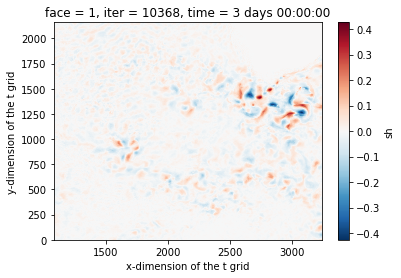

In [88]:
steric_nomean.sh.isel(time=2).plot()

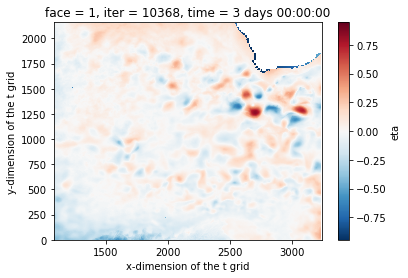

In [90]:
baro_filtered.eta.isel(time=1).plot()

In [4]:
steric_withmean = xr.open_zarr('/swot/SUM02/spencer/steric_inc_mean.zarr')

In [5]:
steric_compare = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/steric_height.zarr')

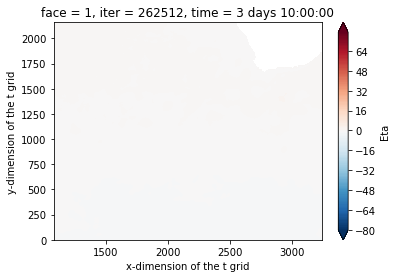

In [17]:
steric_compare.isel(time=10).Eta.plot(levels=np.arange(-80,80,1))